# 2 to 2 process

In [ ]:
from smpl import io

In [2]:
from feynml.interface.qgraf import get_style
import itertools as it
import re

In [3]:
from pyqgraf import qgraf, model
qgraf.install("3.6.5")
xml_string = qgraf.run("nu_e[p1], nu_e_bar[p2]", "nu_e[p3], nu_e_bar[p4]",loops=1,loop_momentum="l",model = model.gws_UnitaryGauge_reduced, style=get_style())


	Please cite the following papers if you use this code:

      [1] Automatic Feynman graph generation J. Comput. Phys. 105 (1993) 279--289 https://doi.org/10.1006/jcph.1993.1074

      [2] Abusing Qgraf Nucl. Instrum. Methods Phys. Res. A 559 (2006) 220--223 https://doi.org/10.1016/j.nima.2005.11.151

      [3] Feynman graph generation and propagator mixing, I Comput. Phys. Commun. 269 (2021) 108103 https://doi.org/10.1016/j.cpc.2021.108103

	


single photon diags 8


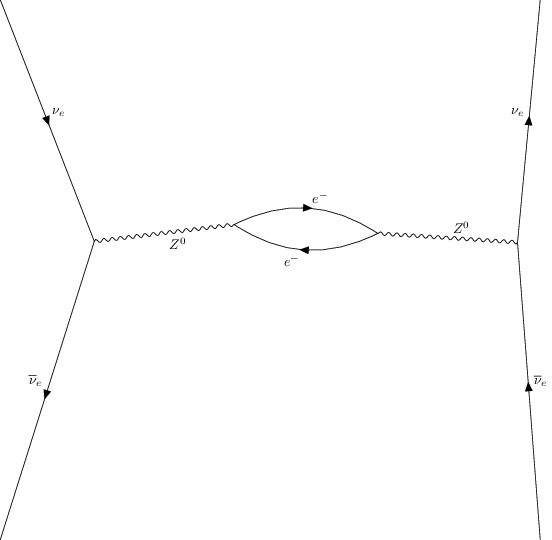

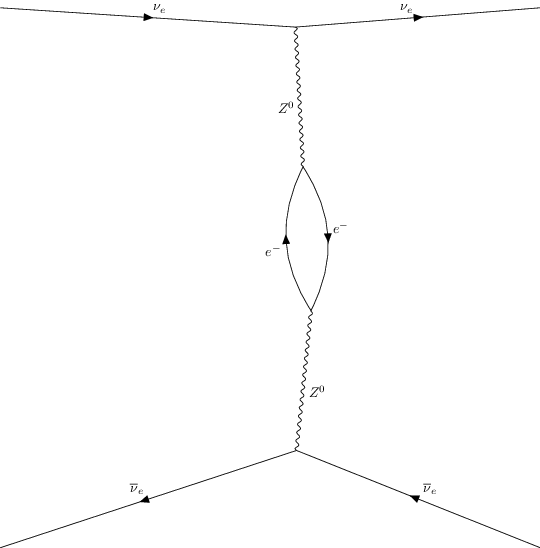

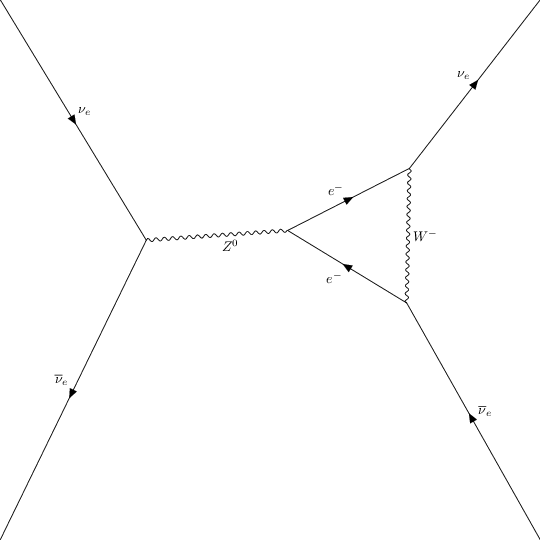

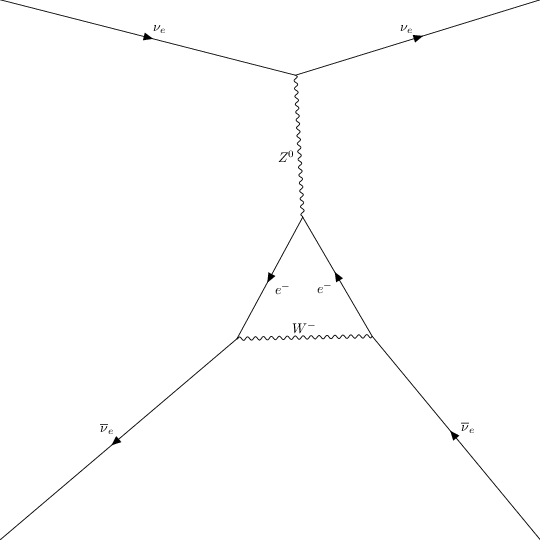

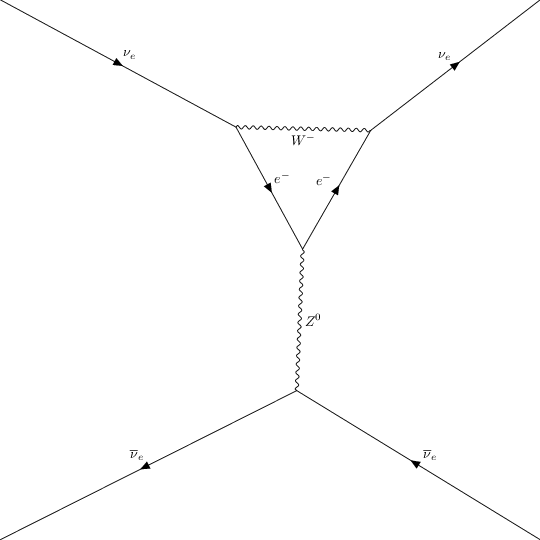

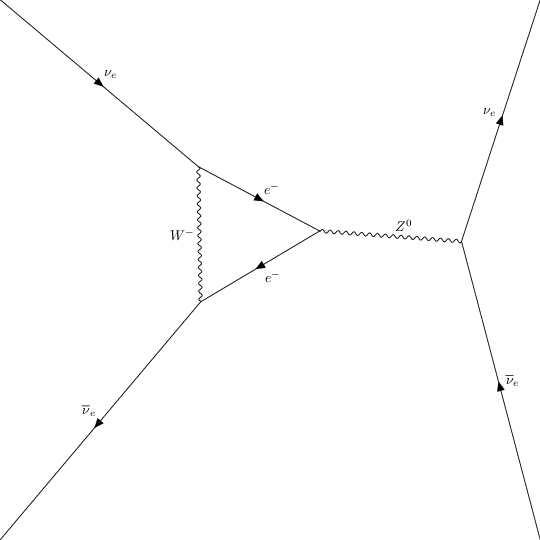

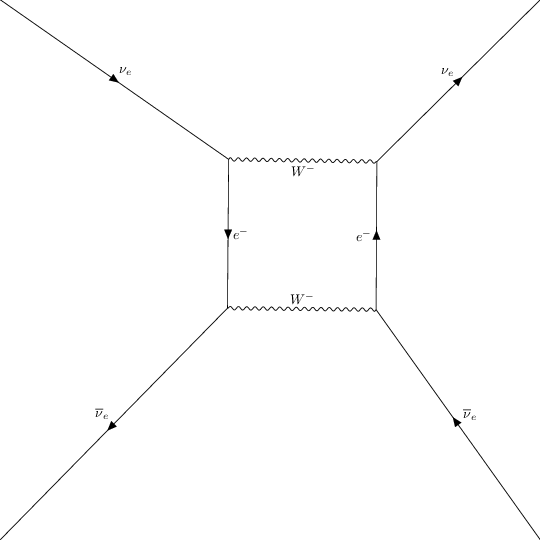

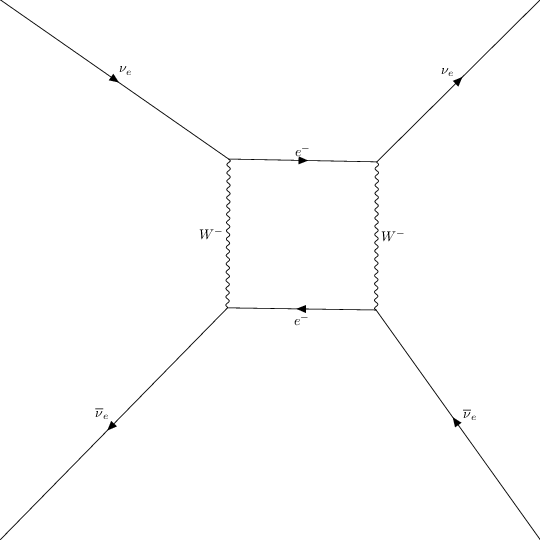

In [5]:
from pathlib import Path
import subprocess
import shlex

from xsdata.formats.dataclass.parsers import XmlParser
from pyfeyn2.render.latex.feynmp import FeynmpRender
from pyfeyn2.render.latex.tikzfeynman import TikzFeynmanRender
from pyfeyn2.render.pyx.pyxrender import PyxRender
from pyfeyn2.feynmandiagram import FeynML

from pyfeyn2.auto.bend import auto_bend
from pyfeyn2.auto.label import auto_label
from pyfeyn2.auto.position import feynman_adjust_points

parser = XmlParser()
fml = parser.from_string(xml_string, FeynML)

def filter_diag(d):
    count = 0
    ecount = 0
    for p in d.propagators:
        if p.pdgid == 22:
            count +=1
        if p.pdgid == 11:
            ecount +=1
    if count >=0 and ecount >=2:
        return True
    return False

ccount=0 
for d in fml.diagrams:
    if filter_diag(d):
        ccount +=1
print("single photon diags", ccount)

for d in fml.diagrams:
    if filter_diag(d):
        d.legs[0].with_xy(-2,2)
        d.legs[1].with_xy(-2,-2)
        d.legs[2].with_xy(2,2)
        d.legs[3].with_xy(2,-2)
        #d.get_point(d.legs[0].target).with_xy(-1,0)
        #d.get_point(d.legs[1].target).with_xy(1,0)
        d = feynman_adjust_points(d,size=15)
        auto_bend(d)
        auto_label(d.propagators)
        auto_label(d.legs)
        #print(d)
        t = TikzFeynmanRender(d)
        #print(t.get_src())
        t.render(show=True)
        #break

In [ ]:
print(xml_string)